# Feature extraction using cp-measure


## Import packages & data

In [1]:
import squidpy as sq
import scanpy as sc
import pandas as pd
import spatialdata as sd
import spatialdata_plot
import anndata as ad
from spatialdata.models import TableModel
import pycytominer
from pycytominer.operations import RobustMAD

In [2]:
# mibitof_sdata = sd.read_zarr("./mibitof.zarr")

mibitof_sdata = sd.read_zarr("/Users/tim.treis/Downloads/mibitof.zarr")
mibitof_sdata

SpatialData object, with associated Zarr store: /Users/tim.treis/Downloads/mibitof.zarr
├── Images
│     ├── 'point8_image': DataArray[cyx] (3, 1024, 1024)
│     ├── 'point16_image': DataArray[cyx] (3, 1024, 1024)
│     └── 'point23_image': DataArray[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point8_labels': DataArray[yx] (1024, 1024)
│     ├── 'point16_labels': DataArray[yx] (1024, 1024)
│     └── 'point23_labels': DataArray[yx] (1024, 1024)
└── Tables
      └── 'table': AnnData (3309, 36)
with coordinate systems:
    ▸ 'point8', with elements:
        point8_image (Images), point8_labels (Labels)
    ▸ 'point16', with elements:
        point16_image (Images), point16_labels (Labels)
    ▸ 'point23', with elements:
        point23_image (Images), point23_labels (Labels)

In [3]:
for point in ["point8", "point16", "point23"]:

    print(f"Calculating image features for '{point}'")
    sq.exp.calculate_image_features(
        sdata=mibitof_sdata,
        labels_key=f"{point}_labels",
        image_key=f"{point}_image",
        adata_key_added=f"morphology_{point}",
        n_jobs=20,
        show_progress_bar=False,
    )

Calculating image features for 'point8'
INFO     Using '20' core(s).                                                                                       
INFO     Calculating 'skimage' label features.                                                                     
INFO     Calculating 'skimage' image features for channel '0'.                                                     
INFO     Calculating 'skimage' image features for channel '1'.                                                     
INFO     Calculating 'skimage' image features for channel '2'.                                                     
INFO     Calculating 'cpmeasure' core features for channel '0'.                                                    
INFO     Calculating 'cpmeasure' core features for channel '1'.                                                    
INFO     Calculating 'cpmeasure' core features for channel '2'.                                                    
INFO     Calculating correlation

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


INFO     Calculating 'skimage' image features for channel '0'.                                                     
INFO     Calculating 'skimage' image features for channel '1'.                                                     
INFO     Calculating 'skimage' image features for channel '2'.                                                     
INFO     Calculating 'cpmeasure' core features for channel '0'.                                                    
INFO     Calculating 'cpmeasure' core features for channel '1'.                                                    


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO     Calculating 'cpmeasure' core features for channel '2'.                                                    


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO     Calculating correlation features between channels '0' and '1'.                                            
INFO     Calculating correlation features between channels '0' and '2'.                                            
INFO     Calculating correlation features between channels '1' and '2'.                                            
Calculating image features for 'point23'
INFO     Using '20' core(s).                                                                                       
INFO     Calculating 'skimage' label features.                                                                     


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


INFO     Calculating 'skimage' image features for channel '0'.                                                     
INFO     Calculating 'skimage' image features for channel '1'.                                                     
INFO     Calculating 'skimage' image features for channel '2'.                                                     
INFO     Calculating 'cpmeasure' core features for channel '0'.                                                    
INFO     Calculating 'cpmeasure' core features for channel '1'.                                                    
INFO     Calculating 'cpmeasure' core features for channel '2'.                                                    
INFO     Calculating correlation features between channels '0' and '1'.                                            
INFO     Calculating correlation features between channels '0' and '2'.                                            
INFO     Calculating correlation features between channels '1' and '2'. 

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 837 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectra

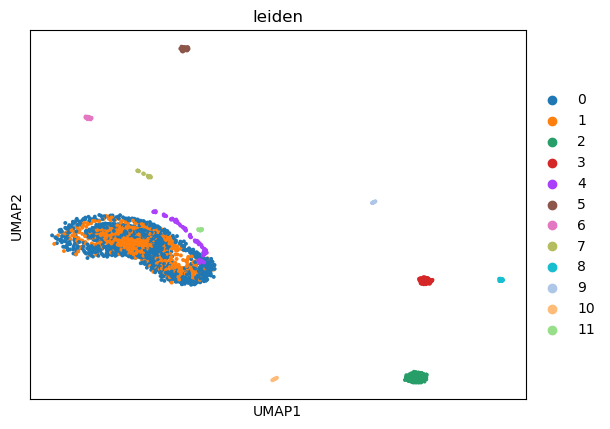

In [4]:
for point in ["point8", "point16", "point23"]:

    mibitof_sdata.tables[f"morphology_{point}"].obs["library_id"] = f"{point}_labels"

adata = ad.concat([mibitof_sdata.tables[f"morphology_{point}"] for point in ["point8", "point16", "point23"]], axis=0)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color="leiden")

## Apply PyCytoMiner

In [5]:
data = adata.to_df()

scaler = RobustMAD(epsilon=1e-18)
fitted_scaler = scaler.fit(data)
fitted_scaled = fitted_scaler.transform(data)

data_scaled = pd.DataFrame(
    fitted_scaled,
    columns=data.columns,
    index=data.index,
)
data_scaled

,RadialDistribution_FracAtD_1of4_ch0,RadialDistribution_MeanFrac_1of4_ch0,RadialDistribution_RadialCV_1of4_ch0,RadialDistribution_FracAtD_2of4_ch0,RadialDistribution_MeanFrac_2of4_ch0,RadialDistribution_RadialCV_2of4_ch0,RadialDistribution_FracAtD_3of4_ch0,RadialDistribution_MeanFrac_3of4_ch0,RadialDistribution_RadialCV_3of4_ch0,RadialDistribution_FracAtD_4of4_ch0,...,Correlation_RWC_1_ch0_ch2,Correlation_RWC_2_ch0_ch2,Correlation_Costes_1_ch1_ch2,Correlation_Costes_2_ch1_ch2,Correlation_Pearson_ch1_ch2,Correlation_Slope_ch1_ch2,Correlation_Manders_1_ch1_ch2,Correlation_Manders_2_ch1_ch2,Correlation_RWC_1_ch1_ch2,Correlation_RWC_2_ch1_ch2
cell_1,-0.941800,-0.934768,-1.463459,-0.237145,-0.478736,3.623037,0.680960,0.940321,1.087921,0.674892,...,1.273715,2.433029,-1.000000e+18,-1.000000e+18,-1.416890,-1.122948,-5.536498,0.674491,-1.927316,-2.460784
cell_2,-0.941800,-0.934768,-1.463459,-1.038846,-0.964875,2.544539,1.342194,1.552021,1.758750,0.780123,...,1.286270,2.447196,-1.000000e+18,-1.000000e+18,-1.416890,-1.122948,-5.536498,0.674491,-1.927316,-2.063429
cell_3,-0.941800,-0.934768,-1.463459,-1.593678,-1.495823,-2.431735,0.992289,4.615582,5.997377,1.625024,...,1.303249,2.457315,-1.000000e+18,-1.000000e+18,-1.275011,1.443060,-2.386881,-30.797192,-0.668359,-3.533039
cell_4,0.700770,0.166902,-0.130237,-0.975859,-0.986622,0.696665,-1.628526,-1.594937,0.080247,2.103357,...,1.281109,2.441326,-1.000000e+18,-1.000000e+18,-1.532448,-30.780949,0.694466,-30.802885,0.084438,-3.537811
cell_5,-0.941800,-0.934768,-1.463459,-1.593678,-1.495823,-2.431735,0.913842,1.040293,5.161723,1.700027,...,1.297668,2.460120,0.000000e+00,-9.332902e+17,-0.739679,85.474471,0.694466,-29.032566,-1.413503,-3.519876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1479,0.154967,-0.101588,0.958639,-0.254115,-0.438627,1.442120,0.060529,0.128966,1.109187,0.309411,...,0.559107,0.162469,0.000000e+00,0.000000e+00,0.575816,0.567913,0.624211,0.674491,0.668119,0.410648
cell_1480,-0.920331,-0.917386,3.495414,-1.013125,-1.009627,-0.365484,0.042665,0.073315,-0.642674,1.979872,...,-0.443893,-0.732928,0.000000e+00,0.000000e+00,0.730796,0.703278,0.680644,0.674491,0.976256,0.839617
cell_1481,-0.500723,-0.478949,0.260279,-0.677854,-0.626036,0.313182,0.274303,0.229927,0.187631,1.077261,...,-0.783455,-0.745501,0.000000e+00,0.000000e+00,0.729408,0.653198,0.694466,0.674491,0.943426,0.779966
cell_1482,2.159162,1.442160,-0.446939,-0.792952,-0.797462,-0.570423,0.649106,0.552861,-1.230597,-1.538059,...,-0.574943,0.664470,-2.749606e+17,0.000000e+00,-0.748463,-0.889605,-0.916292,0.674491,-0.458687,-0.119811


In [6]:
feature_select_opts = [
    "variance_threshold",
    "drop_na_columns",
    "correlation_threshold",
    "blocklist",
    "drop_outliers",
]

data_scaled_filtered = pycytominer.feature_select(
    profiles=data_scaled,
    features=data_scaled.columns.tolist(),
    samples="all",
    operation=feature_select_opts,
)
data_scaled_filtered

,RadialDistribution_RadialCV_1of4_ch0,RadialDistribution_FracAtD_2of4_ch0,RadialDistribution_RadialCV_2of4_ch0,RadialDistribution_FracAtD_3of4_ch0,RadialDistribution_RadialCV_3of4_ch0,RadialDistribution_FracAtD_4of4_ch0,RadialDistribution_RadialCV_4of4_ch0,RadialDistribution_ZernikeMagnitude_1_1_ch0,RadialDistribution_ZernikePhase_1_1_ch0,RadialDistribution_ZernikeMagnitude_2_2_ch0,...,Correlation_Costes_1_ch0_ch2,Correlation_Costes_2_ch0_ch2,Correlation_Pearson_ch0_ch2,Correlation_Manders_1_ch0_ch2,Correlation_Manders_2_ch0_ch2,Correlation_RWC_1_ch0_ch2,Correlation_Pearson_ch1_ch2,Correlation_Manders_1_ch1_ch2,Correlation_Manders_2_ch1_ch2,Correlation_RWC_1_ch1_ch2
cell_1,-1.463459,-0.237145,3.623037,0.680960,1.087921,0.674892,1.425862,-0.660216,1.217065,-0.850979,...,0.674491,0.674491,1.770596,0.674491,1.286939,1.273715,-1.416890,-5.536498,0.674491,-1.927316
cell_2,-1.463459,-1.038846,2.544539,1.342194,1.758750,0.780123,0.122277,-0.146661,-0.432041,0.458399,...,0.674491,0.674491,1.770586,0.674491,1.286939,1.286270,-1.416890,-5.536498,0.674491,-1.927316
cell_3,-1.463459,-1.593678,-2.431735,0.992289,5.997377,1.625024,1.943381,-0.335813,0.605291,-0.221479,...,0.653240,0.323039,1.768362,0.651189,1.272459,1.303249,-1.275011,-2.386881,-30.797192,-0.668359
cell_4,-0.130237,-0.975859,0.696665,-1.628526,0.080247,2.103357,0.403120,2.231226,0.557354,0.954264,...,0.674491,0.674491,1.770480,0.674491,1.286939,1.281109,-1.532448,0.694466,-30.802885,0.084438
cell_5,-1.463459,-1.593678,-2.431735,0.913842,5.161723,1.700027,-0.146604,-0.777552,-0.386477,-0.517196,...,0.674491,0.674491,1.770454,0.674491,1.286939,1.297668,-0.739679,0.694466,-29.032566,-1.413503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1479,0.958639,-0.254115,1.442120,0.060529,1.109187,0.309411,-0.191004,0.166603,-0.751990,-0.571252,...,-17.201557,-183.147328,-0.652393,0.562419,0.050382,0.559107,0.575816,0.624211,0.674491,0.668119
cell_1480,3.495414,-1.013125,-0.365484,0.042665,-0.642674,1.979872,-0.451517,-0.811510,0.965400,-0.821009,...,0.674491,-31.546014,-0.047990,0.674491,-0.409285,-0.443893,0.730796,0.680644,0.674491,0.976256
cell_1481,0.260279,-0.677854,0.313182,0.274303,0.187631,1.077261,0.564884,-0.868215,0.774873,-0.811304,...,0.674491,0.674491,0.900198,0.674491,-0.486699,-0.783455,0.729408,0.694466,0.674491,0.943426
cell_1482,-0.446939,-0.792952,-0.570423,0.649106,-1.230597,-1.538059,-0.856888,1.713873,1.216607,0.149749,...,-9.465563,0.674491,-0.655712,-1.714699,0.473498,-0.574943,-0.748463,-0.916292,0.674491,-0.458687


In [27]:
adata_filtered = ad.AnnData(
    X=data_scaled_filtered,
    obs=adata.obs,
)
del adata_filtered.obs["leiden"]
adata_filtered

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 3770 × 195
    obs: 'region', 'label_id', 'library_id'

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 195 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


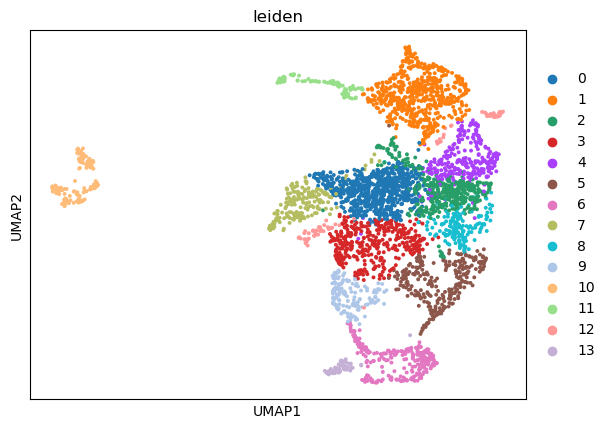

In [28]:
sc.pp.neighbors(adata_filtered)
sc.tl.umap(adata_filtered)
sc.tl.leiden(adata_filtered, resolution=0.5)
sc.pl.umap(adata_filtered, color="leiden")

In [29]:
adata_filtered.uns["spatialdata_attrs"] = {
    "region": ["point8_labels", "point16_labels", "point23_labels"],
    "region_key": "region",
    "instance_key": "label_id",
}

mibitof_sdata.tables["morphology"] = TableModel.parse(adata_filtered)

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `morphology` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point16_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point23_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/Documents/GitHub/spatialdata-plot/src/spatialdata_plot/pl/utils.py:798: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdat

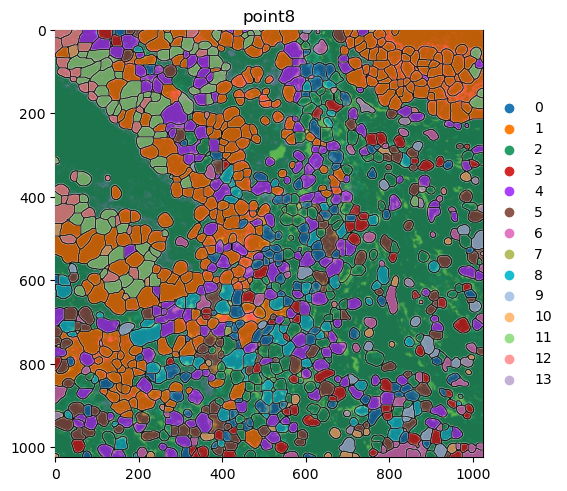

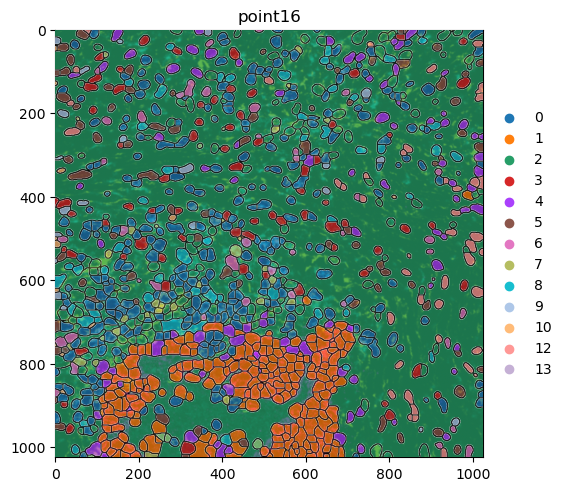

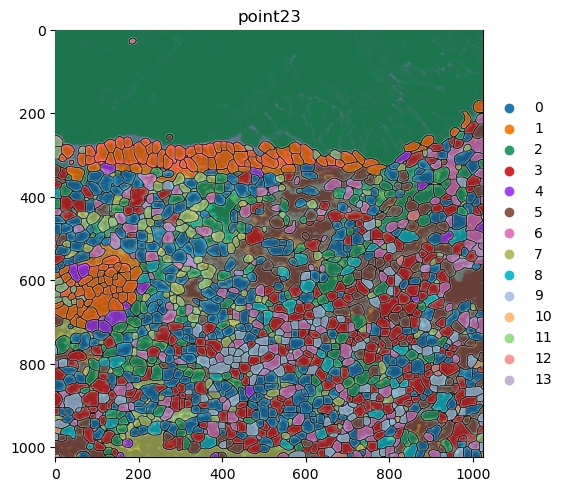

In [33]:
for point in ["point8", "point16", "point23"]:

    mibitof_sdata.pl.render_images().pl.render_labels(
        color="leiden",
        groups=[str(i) for i in range(len(adata_filtered.uns["leiden_colors"]))],
        palette=adata_filtered.uns["leiden_colors"],
        fill_alpha=0.5,
        outline_alpha=1,
    ).pl.show(coordinate_systems=point)